<a href="https://colab.research.google.com/github/neelsoumya/python_machine_learning/blob/main/exercise_singlecell_pcatsne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exercise to perform PCA and tSNE on single-cell data

This notebook demonstrates how to perform PCA and t-SNE on single-cell gene expression data using the scanpy library for data loading and preprocessing, and scikit-learn for the PCA and t-SNE computations. The results are visualized as scatter plots using matplotlib

In [13]:
pip install scanpy scipy matplotlib pandas seaborn

Load libraries

In [14]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

This code performs the following steps:

1.  **Load and Preprocess Data**: It loads the pbmc3k dataset using `scanpy`, normalizes the total counts per cell to 10,000, and then applies a log1p transformation.
2.  **Subset to Marker Genes**: It defines a list of known marker genes and then creates a new pandas DataFrame `expr` containing the expression values for only these genes from the preprocessed AnnData object.
3.  **Perform PCA via scikit-learn**: It uses `sklearn.decomposition.PCA` to perform Principal Component Analysis (PCA) with 2 components on the `expr` data.
4.  **Perform t-SNE via scikit-learn**: It uses `sklearn.manifold.TSNE` to perform t-Distributed Stochastic Neighbor Embedding (t-SNE) with 2 components on the `expr` data.
5.  **Plot with Matplotlib**: It generates a figure with two subplots using `matplotlib`. The left subplot shows the PCA results (PC1 vs PC2), and the right subplot shows the t-SNE results (t-SNE1 vs t-SNE2) as scatter plots.

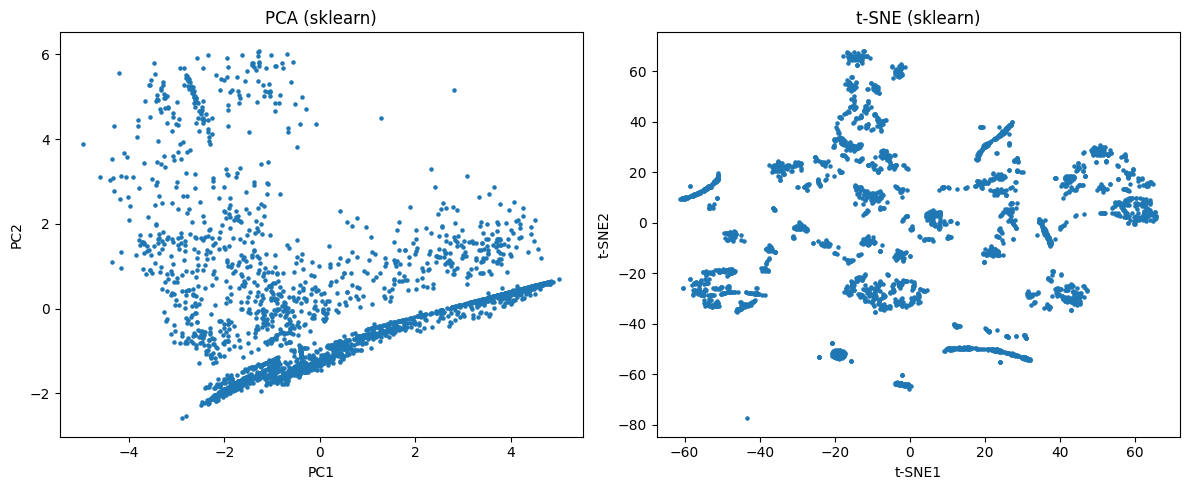

In [15]:
# 1. Load & preprocess (same as before)
adata = sc.datasets.pbmc3k()
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

# 2. Subset to marker genes
marker_genes = [
    'CD3D','CD3E','CD4','CD8A',
    'CD14','LYZ',
    'MS4A1',
    'GNLY','NKG7'
]
genes = [g for g in marker_genes if g in adata.var_names]
expr = pd.DataFrame(
    adata[:, genes].X.toarray(),
    index=adata.obs_names,
    columns=genes
)

# --------------------------------------------
# A) Using Scanpy’s PCA + t-SNE
# --------------------------------------------
# Put the expression back into an AnnData
#adata_marker = sc.AnnData(expr)
# Compute PCA
#sc.tl.pca(adata_marker, svd_solver='arpack', n_comps=10)
# Compute t-SNE on top PCs
#sc.pp.neighbors(adata_marker, n_pcs=10)      # needed for t-SNE graph abstraction
#sc.tl.tsne(adata_marker, n_pcs=10)

# Plot
#sc.pl.pca_scatter(adata_marker, color=None, title='PCA (marker genes)')
#sc.pl.tsne(adata_marker, color=None, title='t-SNE (marker genes)')

# --------------------------------------------
# B) Using scikit-learn directly
# --------------------------------------------
# 1) PCA via sklearn
pca = PCA(n_components=2)
pcs = pca.fit_transform(expr.values)  # shape (n_cells, 2)

# 2) t-SNE via sklearn
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=0)
tsne_coords = tsne.fit_transform(expr.values)

# 3) Plot with Matplotlib
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.scatter(pcs[:, 0], pcs[:, 1], s=5)
ax1.set_xlabel('PC1'); ax1.set_ylabel('PC2')
ax1.set_title('PCA (sklearn)')

ax2.scatter(tsne_coords[:, 0], tsne_coords[:, 1], s=5)
ax2.set_xlabel('t-SNE1'); ax2.set_ylabel('t-SNE2')
ax2.set_title('t-SNE (sklearn)')

plt.tight_layout()
plt.show()
